In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#load the data
Nba2021 = pd.read_csv('NBA2021.csv')
Nba2022 = pd.read_csv('NBA2022.csv')
Nba2023 = pd.read_csv('NBA2023.csv')
Nba2024 = pd.read_csv('NBA2024.csv')

In [52]:
Nba2021['Year'] = 2021
Nba2022['Year'] = 2022
Nba2023['Year'] = 2023
Nba2024['Year'] = 2024



In [53]:
#check for NAN and inf values
Nba2024.isnull().sum()

Player     1
Age        1
G          1
GS         1
MP         1
FG         1
FGA        1
FG%        9
3P         1
3PA        1
3P%       47
2P         1
2PA        1
2P%       14
eFG%       9
FT         1
FTA        1
FT%       60
ORB        1
DRB        1
TRB        1
AST        1
STL        1
BLK        1
TOV        1
PF         1
PTS        1
Year       0
dtype: int64

In [54]:
#dropNA values
Nba2021.dropna()
Nba2022.dropna()
Nba2023.dropna()
Nba2024.dropna()  

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Joel Embiid,29.0,39.0,39.0,33.6,11.5,21.8,0.529,1.4,3.6,...,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,2024
1,Luka Dončić,24.0,70.0,70.0,37.5,11.5,23.6,0.487,4.1,10.6,...,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,2024
2,Giannis Antetokounmpo,29.0,73.0,73.0,35.2,11.5,18.8,0.611,0.5,1.7,...,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,2024
3,Shai Gilgeous-Alexander,25.0,75.0,75.0,34.0,10.6,19.8,0.535,1.3,3.6,...,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,2024
4,Jalen Brunson,27.0,77.0,77.0,35.4,10.3,21.4,0.479,2.7,6.8,...,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Alondes Williams,24.0,7.0,0.0,2.3,0.3,1.1,0.250,0.0,0.6,...,0.0,0.1,0.1,0.0,0.0,0.1,0.3,0.3,0.7,2024
721,Usman Garuba,21.0,6.0,0.0,3.0,0.2,1.0,0.167,0.0,0.2,...,0.5,0.7,1.2,0.2,0.2,0.5,0.3,0.3,0.5,2024
722,E.J. Liddell,23.0,8.0,0.0,2.9,0.1,0.8,0.167,0.0,0.6,...,0.0,0.6,0.6,0.1,0.3,0.3,0.3,0.3,0.5,2024
723,Pete Nance,23.0,8.0,0.0,3.4,0.1,0.8,0.167,0.1,0.1,...,0.0,0.4,0.4,0.0,0.1,0.0,0.1,0.3,0.4,2024


Because players show up multiple times in the data because of trades, we need to keep the data in where the games played is the most for that player. it is usually the total games played for the player. 

In [55]:
# Sort by Player name and Games played (G) descending
Nba2021_sorted = Nba2021.sort_values(by=["Player", "G"], ascending=[True, False])

# Drop duplicates by Player, keeping the row with the most games
Nba2021_cleaned = Nba2021_sorted.drop_duplicates(subset="Player", keep="first")

Nba21 = Nba2021_cleaned.set_index("Player")


In [56]:
Nba2022_sorted = Nba2022.sort_values(by=["Player", "G"], ascending=[True, False])

# Drop duplicates by Player, keeping the row with the most games
Nba2022_cleaned = Nba2022_sorted.drop_duplicates(subset="Player", keep="first")

Nba22 = Nba2022_cleaned.set_index("Player")

In [57]:
Nba2023_sorted = Nba2023.sort_values(by=["Player", "G"], ascending=[True, False])

# Drop duplicates by Player, keeping the row with the most games
Nba2023_cleaned = Nba2023_sorted.drop_duplicates(subset="Player", keep="first")

Nba23 = Nba2023_cleaned.set_index("Player")

In [58]:
Nba2024_sorted = Nba2024.sort_values(by=["Player", "G"], ascending=[True, False])

# Drop duplicates by Player, keeping the row with the most games
Nba2024_cleaned = Nba2024_sorted.drop_duplicates(subset="Player", keep="first")

Nba24 = Nba2024_cleaned.set_index("Player")

Now lets concatenate the 4 dataframes into one. 

In [63]:
Nba_combined = pd.concat([Nba21,Nba22,Nba23, Nba24])
Nba_combined.drop(columns=['Unnamed: 27', 'Unnamed: 28'], inplace=True)

#sort by player
Nba_combined = Nba_combined.sort_values(by=["Player"])

Nba_combined.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
Player,,,,,,,,,,,,,,,,,,,,,
A.J. Green,24.0,56.0,0.0,11.0,1.5,3.5,0.423,1.2,3.0,0.408,...,0.2,1.0,1.1,0.5,0.2,0.1,0.2,0.9,4.5,2024
A.J. Green,23.0,35.0,1.0,9.9,1.5,3.6,0.424,1.3,3.0,0.419,...,0.2,1.1,1.3,0.6,0.2,0.0,0.3,0.9,4.4,2023
A.J. Lawson,23.0,42.0,0.0,7.4,1.3,2.9,0.446,0.3,1.2,0.260,...,0.3,0.9,1.2,0.5,0.2,0.1,0.3,0.5,3.2,2024
A.J. Lawson,22.0,15.0,0.0,7.2,1.5,2.9,0.500,0.7,1.7,0.400,...,0.4,1.0,1.4,0.1,0.1,0.0,0.2,0.7,3.7,2023
AJ Griffin,20.0,20.0,0.0,8.6,0.9,3.1,0.290,0.5,2.0,0.256,...,0.1,0.8,0.9,0.3,0.1,0.1,0.4,0.3,2.4,2024


Here we are going to be adding columns to the dataframe for more advanced stats

In [96]:
#making sure Year is a number
Nba_combined['Year'] = pd.to_numeric(Nba_combined['Year'])


# Helper for True Shooting Attempts
tsa = Nba_combined['FGA'] + 0.44 * Nba_combined['FTA']

# --- Offensive Metrics ---
Nba_combined['USG%'] = 100 * (Nba_combined['FGA'] + 0.44 * Nba_combined['FTA'] + Nba_combined['TOV']) / (Nba_combined['MP'] + 1e-5)
Nba_combined['TS%'] = Nba_combined['PTS'] / (2 * (tsa + 1e-5))
Nba_combined['PTS_per_TSA'] = Nba_combined['PTS'] / (tsa + 1e-5)
Nba_combined['FT_rate'] = Nba_combined['FTA'] / (Nba_combined['FGA'] + 1e-5)
Nba_combined['3P_rate'] = Nba_combined['3PA'] / (Nba_combined['FGA'] + 1e-5)

# --- Playmaking & Turnovers ---
Nba_combined['AST_TO'] = Nba_combined['AST'] / (Nba_combined['TOV'] + 1e-5)
Nba_combined['TOV%'] = 100 * Nba_combined['TOV'] / (tsa + Nba_combined['TOV'] + 1e-5)

# --- Rebounding & Defense ---
Nba_combined['TRB%_approx'] = 100 * Nba_combined['TRB'] / (Nba_combined['MP'] + 1e-5)
Nba_combined['STL_per_min'] = Nba_combined['STL'] / (Nba_combined['MP'] + 1e-5)
Nba_combined['BLK_per_min'] = Nba_combined['BLK'] / (Nba_combined['MP'] + 1e-5)
Nba_combined['STL%'] = 100 * Nba_combined['STL'] / (Nba_combined['MP'] + 1e-5)
Nba_combined['BLK%'] = 100 * Nba_combined['BLK'] / (Nba_combined['MP'] + 1e-5)

# --- Efficiency ---
Nba_combined['Raw_EFF'] = (
    Nba_combined['PTS'] + Nba_combined['TRB'] + Nba_combined['AST'] +
    Nba_combined['STL'] + Nba_combined['BLK'] -
    (Nba_combined['FGA'] - Nba_combined['FG']) -
    (Nba_combined['FTA'] - Nba_combined['FT']) -
    Nba_combined['TOV']
) / (Nba_combined['MP'] + 1e-5)

# --- Fouls & Discipline ---
Nba_combined['PF_per_min'] = Nba_combined['PF'] / (Nba_combined['MP'] + 1e-5)

# --- Bonus Proxies ---
Nba_combined['Load'] = (
    Nba_combined['FGA'] + 0.44 * Nba_combined['FTA'] +
    Nba_combined['AST'] + Nba_combined['TOV']
)
Nba_combined['Creation_proxy'] = (
    Nba_combined['AST'] * 0.2 + Nba_combined['PTS'] * 0.05
)

Exploratory Data Analysis

In [97]:
Nba_combined.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'USG', 'TS%', 'AST_TO',
       'REB_per_min', 'PTS_per_FGA', 'FT_rate', '3P_rate', 'EFF', 'TOV%',
       'PF_per_min', 'STL_per_min', 'BLK_per_min', 'TRB_rate', 'PTS_log',
       'AST_log', 'TRB_log', 'STL_log', 'BLK_log', 'TOV_log', 'USG%',
       'PTS_per_TSA', 'TRB%_approx', 'STL%', 'BLK%', 'Raw_EFF', 'Load',
       'Creation_proxy'],
      dtype='object')

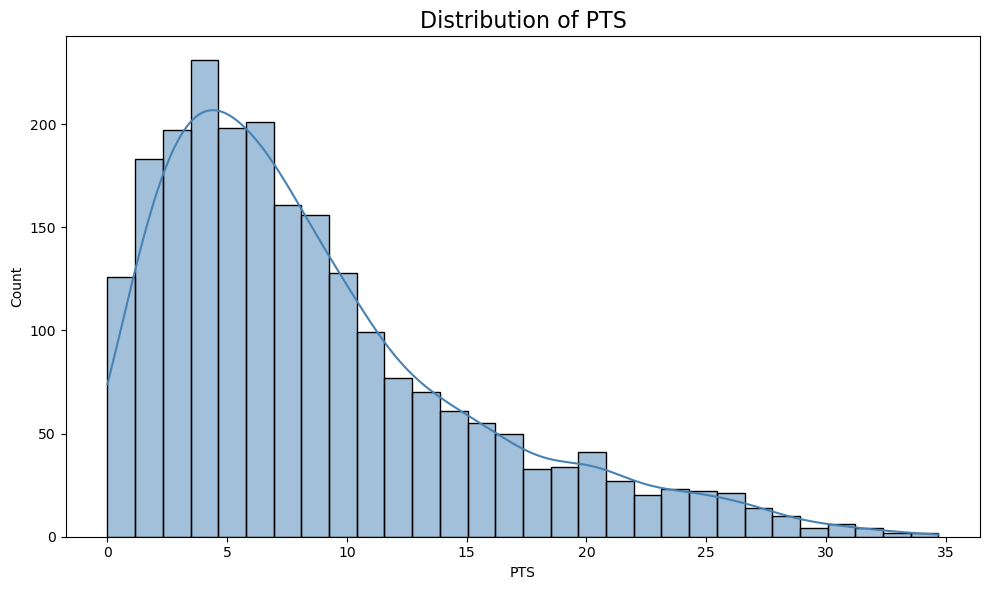

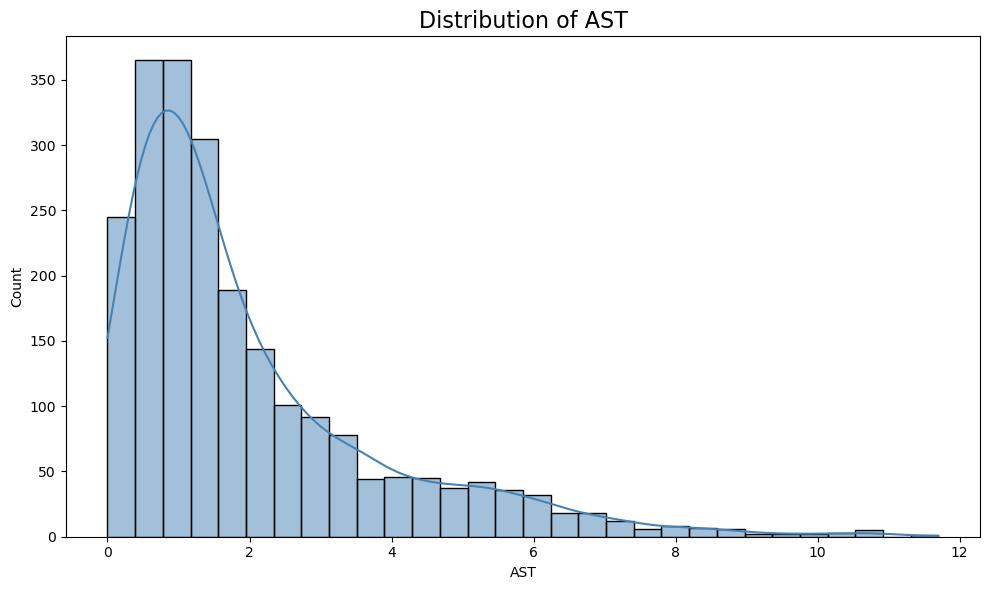

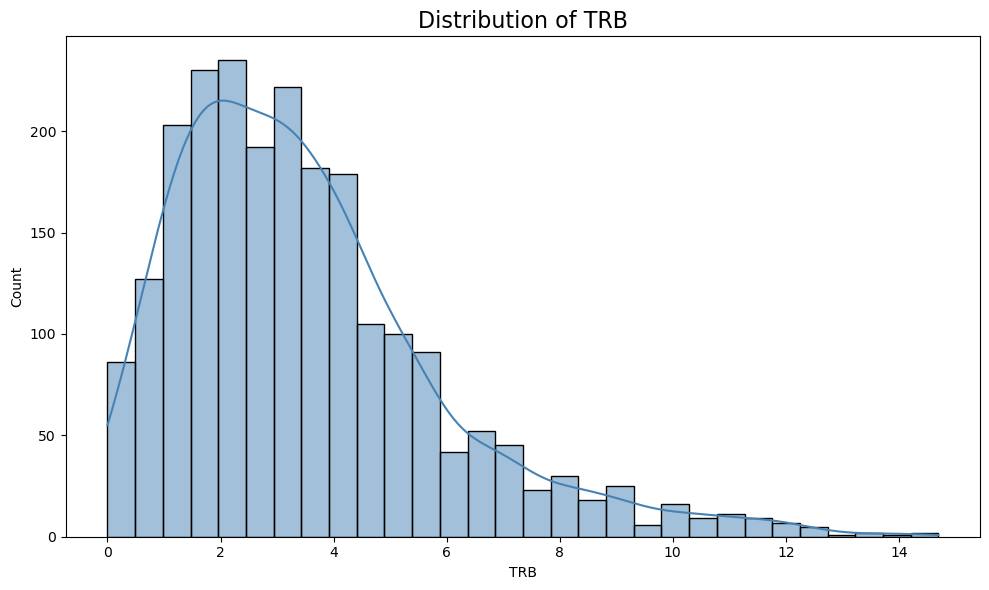

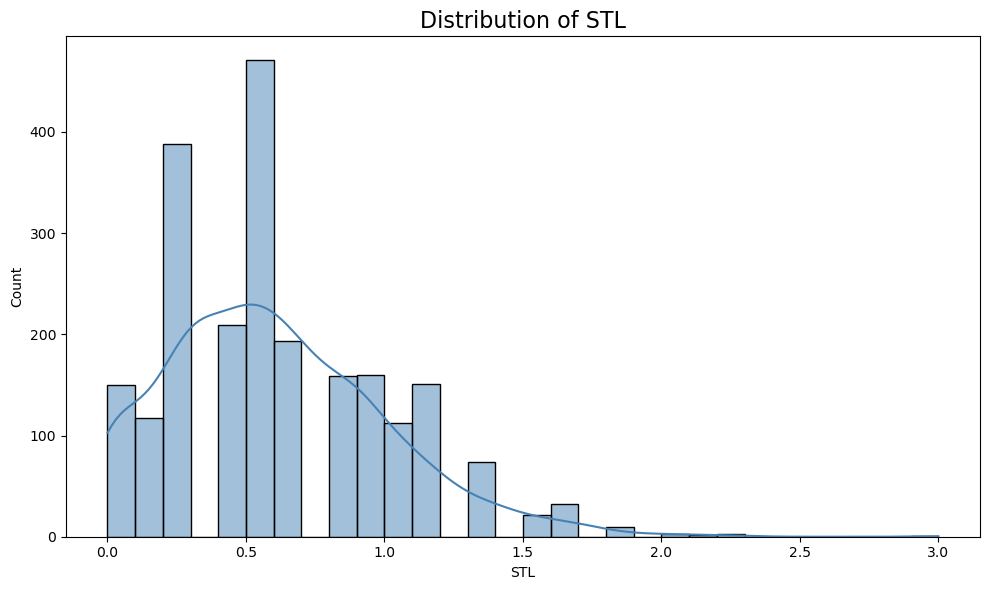

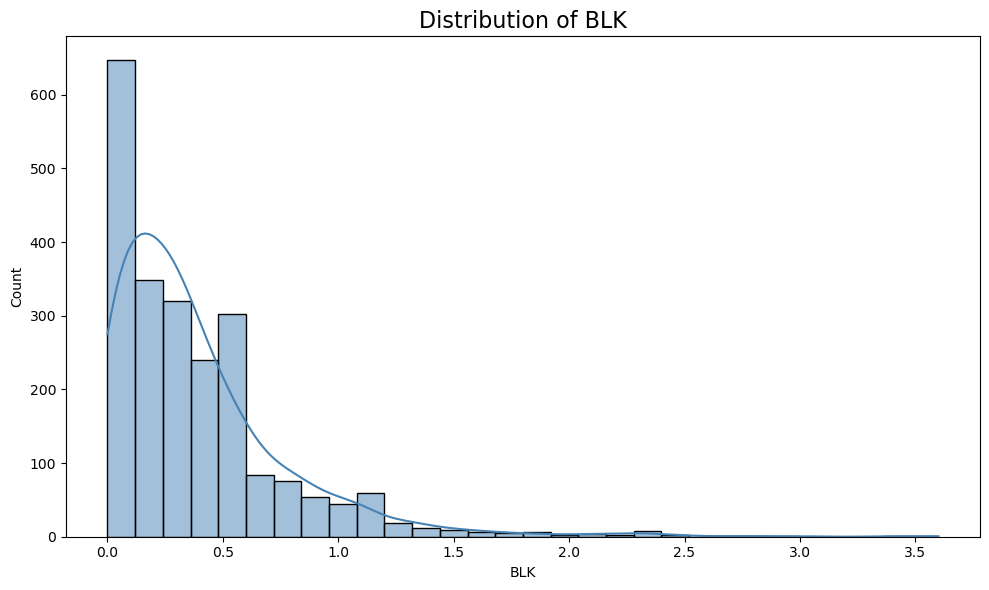

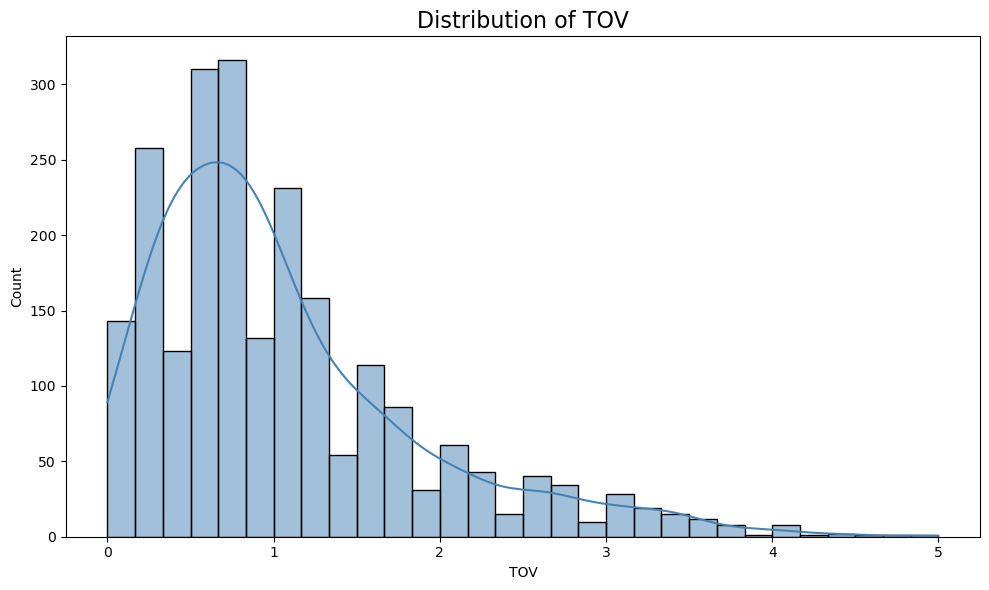

In [98]:

targets = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV']

for column in targets:
    plt.figure(figsize=(10, 6))
    sns.histplot(Nba_combined[column], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

Seems like the targets are right skewed, lets try to log transform them. 

In [99]:
for col in targets:
    Nba_combined[f'{col}_log'] = np.log1p(Nba_combined[col])


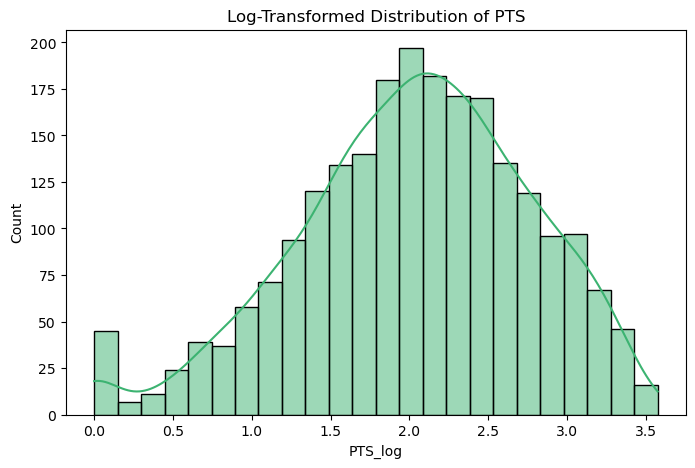

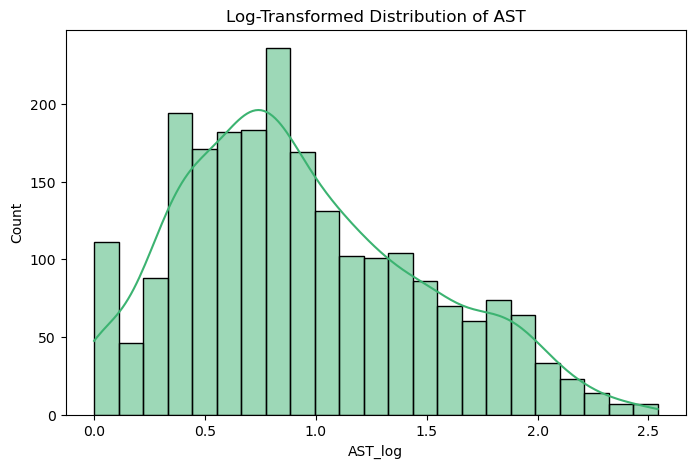

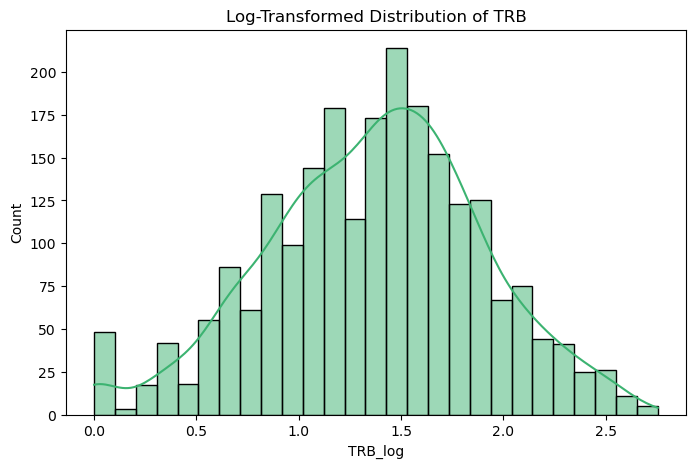

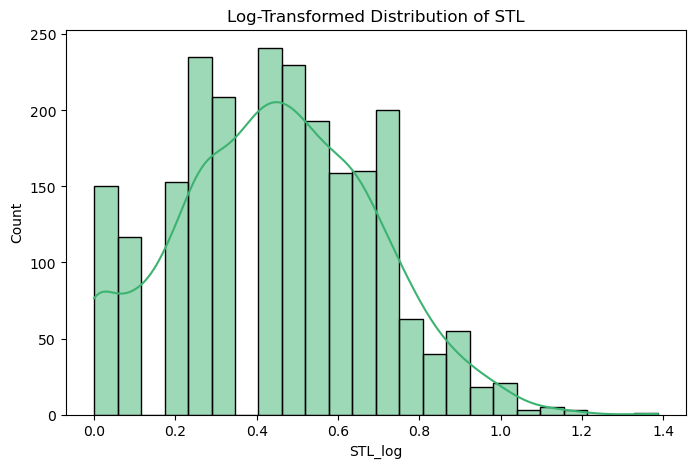

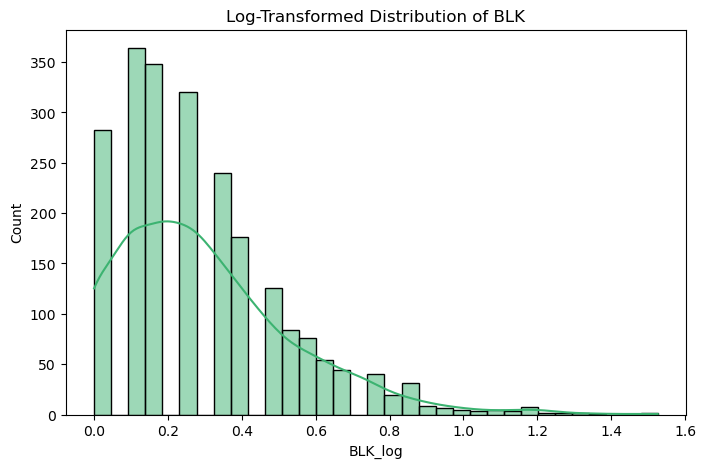

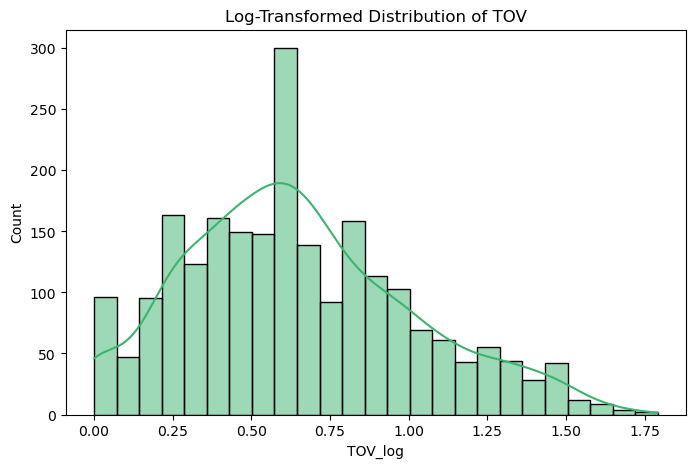

In [100]:
for col in targets:
    plt.figure(figsize=(8, 5))
    sns.histplot(Nba_combined[f'{col}_log'], kde=True, color='mediumseagreen')
    plt.title(f'Log-Transformed Distribution of {col}')
    plt.show()

In [101]:
# Before
print("Original target correlations:")
print(Nba_combined[targets].corr())

# After
log_targets = [f"{col}_log" for col in targets]
print("\nLog-transformed target correlations:")
print(Nba_combined[log_targets].corr())

Original target correlations:
          PTS       AST       TRB       STL       BLK       TOV
PTS  1.000000  0.745490  0.648873  0.630468  0.359665  0.843332
AST  0.745490  1.000000  0.422399  0.674623  0.133378  0.840131
TRB  0.648873  0.422399  1.000000  0.463845  0.675008  0.601689
STL  0.630468  0.674623  0.463845  1.000000  0.293346  0.621340
BLK  0.359665  0.133378  0.675008  0.293346  1.000000  0.309315
TOV  0.843332  0.840131  0.601689  0.621340  0.309315  1.000000

Log-transformed target correlations:
          PTS_log   AST_log   TRB_log   STL_log   BLK_log   TOV_log
PTS_log  1.000000  0.761154  0.763082  0.695255  0.455882  0.812854
AST_log  0.761154  1.000000  0.534399  0.724088  0.224752  0.836306
TRB_log  0.763082  0.534399  1.000000  0.570253  0.694891  0.673817
STL_log  0.695255  0.724088  0.570253  1.000000  0.362993  0.668570
BLK_log  0.455882  0.224752  0.694891  0.362993  1.000000  0.393932
TOV_log  0.812854  0.836306  0.673817  0.668570  0.393932  1.000000


In [102]:
Nba_combined.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'USG', 'TS%', 'AST_TO',
       'REB_per_min', 'PTS_per_FGA', 'FT_rate', '3P_rate', 'EFF', 'TOV%',
       'PF_per_min', 'STL_per_min', 'BLK_per_min', 'TRB_rate', 'PTS_log',
       'AST_log', 'TRB_log', 'STL_log', 'BLK_log', 'TOV_log', 'USG%',
       'PTS_per_TSA', 'TRB%_approx', 'STL%', 'BLK%', 'Raw_EFF', 'Load',
       'Creation_proxy'],
      dtype='object')

In [103]:
#this is now to see what data seems redundant for the model
targets = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV'] + [f'{col}_log' for col in ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV']]
predictors = [col for col in Nba_combined.columns if col not in targets and Nba_combined[col].dtype in [np.float64, np.int64]]

In [84]:
for col in ['PTS', 'TRB', 'AST', 'STL', 'BLK']:
    corrs = Nba_combined[predictors + [col]].corr()[col].sort_values(ascending=False)
    print(f"\nTop correlations with {col}:\n{corrs.head(10)}")



Top correlations with PTS:
PTS    1.000000
FG     0.991858
FGA    0.981984
2PA    0.923562
2P     0.907737
FT     0.895387
FTA    0.883571
MP     0.882396
GS     0.762660
3PA    0.726354
Name: PTS, dtype: float64

Top correlations with TRB:
TRB    1.000000
DRB    0.974519
ORB    0.835465
2P     0.759305
2PA    0.711965
PF     0.702151
MP     0.696049
FG     0.687928
GS     0.641551
FTA    0.640530
Name: TRB, dtype: float64

Top correlations with AST:
AST    1.000000
FGA    0.761267
FG     0.734082
MP     0.730385
2PA    0.709631
FT     0.676229
2P     0.662512
FTA    0.657720
GS     0.600337
3PA    0.572450
Name: AST, dtype: float64

Top correlations with STL:
STL    1.000000
MP     0.739910
FGA    0.647210
FG     0.631117
2PA    0.587868
GS     0.580557
PF     0.570491
2P     0.559614
FT     0.517631
FTA    0.512088
Name: STL, dtype: float64

Top correlations with BLK:
BLK            1.000000
BLK_per_min    0.662518
ORB            0.655887
DRB            0.620367
PF             0.542

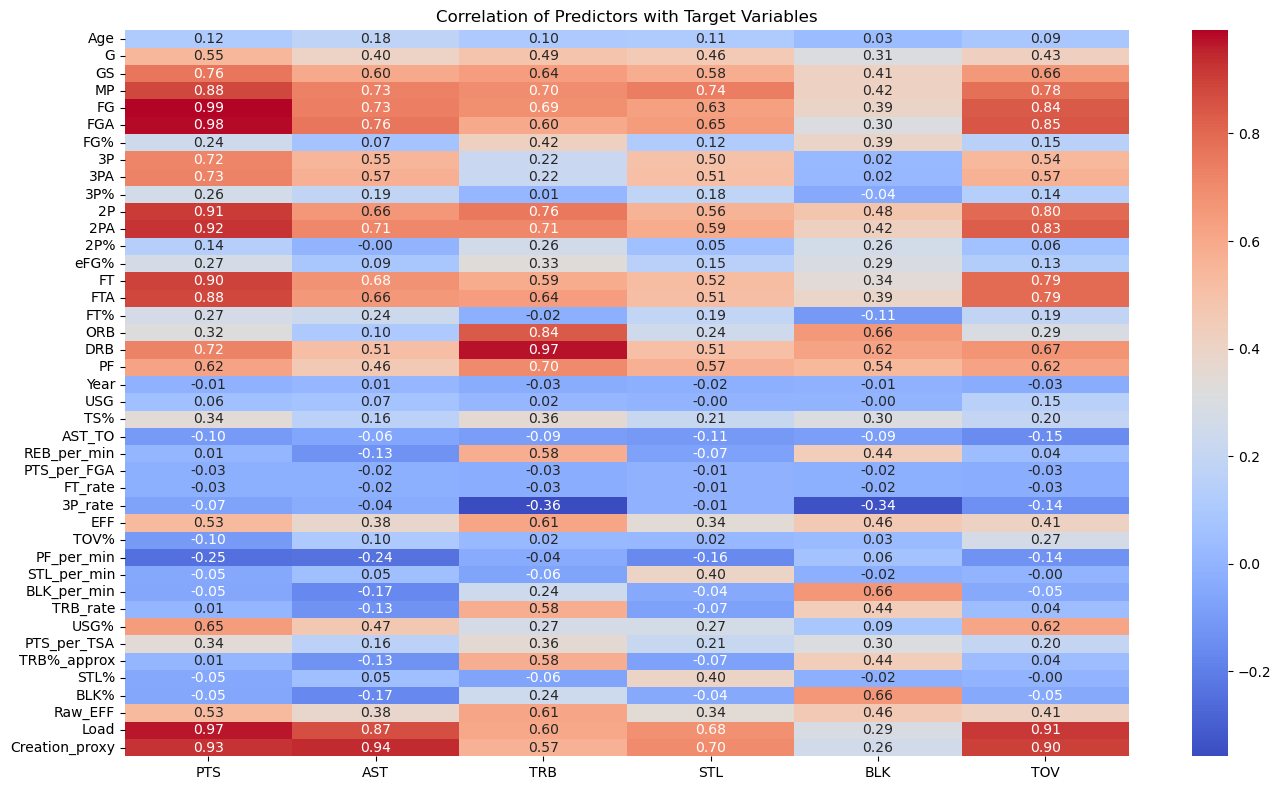

In [104]:
#lets make a heatmap of the correlation between the features    
target_corrs = Nba_combined[predictors + ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV']].corr().loc[predictors, ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV']]

plt.figure(figsize=(14, 8))
sns.heatmap(target_corrs, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation of Predictors with Target Variables")
plt.tight_layout()
plt.show()

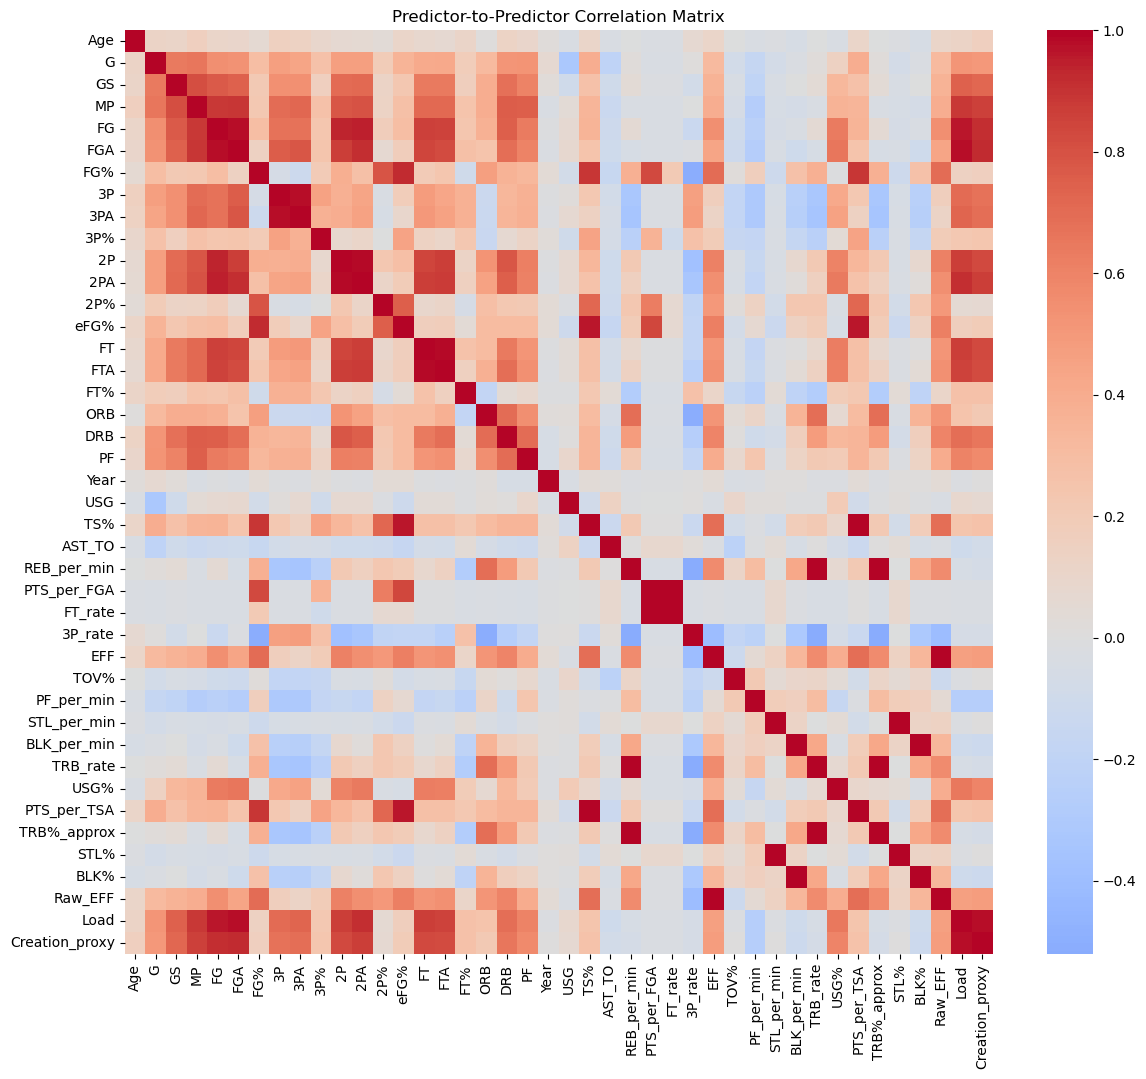

In [106]:
predictor_corr = Nba_combined[predictors].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(predictor_corr, cmap='coolwarm', center=0)
plt.title("Predictor-to-Predictor Correlation Matrix")
plt.show()

Here are some good things to remember: 
PTS - FGA, 2P, MP,FT,FG,3PA,GS,Creation_Proxy, Load 
AST - MP,FGA,FT,3PA,USG, Creation_Proxy, Load 
TRB - DRB,ORB,TRB_rate, MP, Creation_Proxy, Load 
STL - STL_per_min, TRB_rate, DRB, EFF , Creation_Proxy, Load 
BLK - BLK_per_min, TRB_rate, DRB, EFF
TOV - MP, FGA, FTA , EFF , Creation_Proxy, Load 

In [105]:
Nba_combined.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'USG', 'TS%', 'AST_TO',
       'REB_per_min', 'PTS_per_FGA', 'FT_rate', '3P_rate', 'EFF', 'TOV%',
       'PF_per_min', 'STL_per_min', 'BLK_per_min', 'TRB_rate', 'PTS_log',
       'AST_log', 'TRB_log', 'STL_log', 'BLK_log', 'TOV_log', 'USG%',
       'PTS_per_TSA', 'TRB%_approx', 'STL%', 'BLK%', 'Raw_EFF', 'Load',
       'Creation_proxy'],
      dtype='object')